## EDA

The notebook demonstrates the raw annotations and the derived keypoints, utilized in the model training process.

In [4]:
cd soccernet-calibration-sportlight/

/home/cesarlojo/soccernet-calibration-sportlight


/home/cesarlojo/soccernet-calibration-sportlight/tfgenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
import cv2

import matplotlib.pyplot as plt

from src.datatools.reader import read_annot
from src.datatools.intersections import get_intersections

%load_ext autoreload
%autoreload 2

In [7]:
sample_id = '00016'
# img_path = f'/workdir/data/dataset/valid/{sample_id}.jpg'
# annot_path = f'/workdir/data/dataset/valid/{sample_id}.json'
img_path = f'data/dataset/valid/{sample_id}.jpg'
annot_path = f'data/dataset/valid/{sample_id}.json'

In [8]:
# Print the sample annotation
read_annot(annot_path)

{'Circle right': [(0.2986796796321869, 0.5209305882453918),
  (0.2752734422683716, 0.5486666560173035),
  (0.26911717653274536, 0.5632638931274414),
  (0.2658359408378601, 0.580791711807251),
  (0.2724062502384186, 0.6004999876022339),
  (0.2912890613079071, 0.6231250166893005),
  (0.341796875, 0.6552500128746033),
  (0.388609379529953, 0.672041654586792),
  (0.44239845871925354, 0.6859027743339539),
  (0.5031640529632568, 0.6939305663108826)],
 'Big rect. right main': [(0.15595312416553497, 0.40194442868232727),
  (0.7588671445846558, 0.9106944799423218)],
 'Small rect. left bottom': [(0.7610546946525574, 0.9126250147819519),
  (1.0, 0.844666600227356)],
 'Big rect. right top': [(0.15595312416553497, 0.40194442868232727),
  (0.5229452848434448, 0.33593055605888367)],
 'Small rect. right main': [(0.5477499961853027, 0.44231945276260376),
  (0.8547031283378601, 0.637055516242981)],
 'Small rect. right bottom': [(0.8547031283378601, 0.6359166502952576),
  (0.9916172027587891, 0.603083312

In [9]:
IMG_SIZE = (960, 540)

POINT_COLOR = (0, 0, 255)
INTERSECTION_COLOR = (255, 0, 0)
CIRCLE_COLOR = (0, 255, 255)

LINE_COLORS = {
    "Big rect. left bottom": (45, 175, 80),
    "Big rect. left main": (40, 175, 170),
    "Big rect. left top": (255, 175, 65),
    "Big rect. right bottom": (80, 0, 50),
    "Big rect. right main": (70, 0, 40),
    "Big rect. right top": (255, 0, 50),
    "Circle central": (255, 0, 0),
    "Circle left": (255, 127, 0),
    "Circle right": (255, 0, 127),
    "Goal left crossbar": (0, 0, 255),
    "Goal left post left ": (0, 127, 255),
    "Goal left post right": (127, 0, 255),
    "Goal right crossbar": (0, 0, 255),
    "Goal right post left": (0, 255, 255),
    "Goal right post right": (255, 0, 255),
    "Middle line": (0, 0, 0),
    "Side line bottom": (65, 85, 150),
    "Side line left": (50, 255, 255),
    "Side line right": (85, 60, 0),
    "Side line top": (255, 85, 65),
    "Small rect. left bottom": (0, 127, 127),
    "Small rect. left main": (127, 127, 127),
    "Small rect. left top": (127, 127, 0),
    "Small rect. right bottom": (0, 127, 127),
    "Small rect. right main": (127, 127, 127),
    "Small rect. right top": (127, 127, 0)
}

In [10]:
# Blue circles - actual points, used in model training and prediucted
# Small red dots - points from annotation as-is
def draw_annot(img, annot, draw_circles=False):
    h, w, _ = img.shape
    for cls in annot:
        points = annot[cls]
        points = [(int(round(point[0]*w)), int(round(point[1]*h))) for point in points]
        for point in points:
            cv2.circle(img, point, 1, POINT_COLOR, 1)
            if draw_circles:
                cv2.circle(img, point, 5, CIRCLE_COLOR, 1)
        if len(points) > 1:
            for i in range(len(points)-1):
                cv2.line(img, points[i], points[i+1], LINE_COLORS[cls], 1, cv2.LINE_AA)
    inters, _ = get_intersections(annot)
    print(inters)
    for point in inters.values():
        if point is not None:
            point = (int(round(point[0])), int(round(point[1])))
            cv2.circle(img, point, 4, INTERSECTION_COLOR, 1)
    return img

In [11]:
def show_img(img):
    plt.figure(dpi=150)
    plt.imshow(img[:, :, ::-1])  # BGR2RGB
    plt.show()

{0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: (149.71499919891355, 217.04999148845667), 18: None, 19: (509.26826137583595, 180.6698667635819), 20: (819.2643984363682, 343.5636890090722), 21: (524.6985853732463, 238.44518153817927), 22: (956.6767300174548, 325.0277250943382), 23: (645.6185749773365, 224.66375743355533), 24: (729.0785450364443, 184.19036364383356), 25: (856.0024102767371, 219.37426985279942), 26: (725.5702935737522, 250.46045033363302), 27: (852.0913347363672, 291.28289294734793), 28: None, 29: (381.0733167525188, 139.3073335266987), 51: array([481.92122876, 374.73099734]), 52: array([286.14995711, 281.80856457]), 53: (263.66883239432616, 325.8428212483286), 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None,

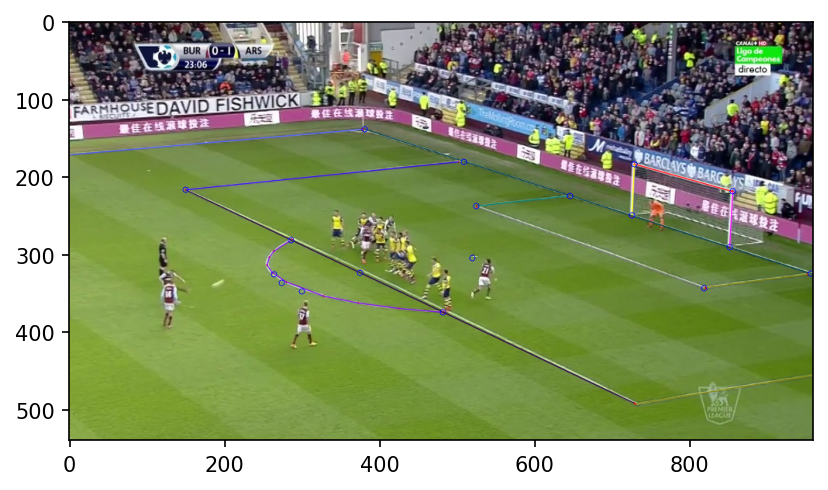

In [12]:
img = cv2.imread(img_path)
annot = read_annot(annot_path)
annot_img = draw_annot(img, annot, False)
show_img(annot_img)